In [44]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [45]:
dataset=pd.read_csv('BTC_USD.csv',index_col="Date",parse_dates=True)
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,28994.00977,29600.62695,28803.58594,29374.15234,29374.15234,4.073030e+10
2021-02-01,29376.45508,33155.11719,29091.18164,32127.26758,32127.26758,6.786542e+10
2021-03-01,32129.40820,34608.55859,32052.31641,32782.02344,32782.02344,7.866524e+10
2021-04-01,32810.94922,33440.21875,28722.75586,31971.91406,31971.91406,8.116348e+10
2021-05-01,31977.04102,34437.58984,30221.18750,33992.42969,33992.42969,6.754732e+10


In [46]:
#Not applicable values
dataset.isna().any() 

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 152 entries, 2021-01-01 to 2021-01-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       152 non-null    float64
 1   High       152 non-null    float64
 2   Low        152 non-null    float64
 3   Close      152 non-null    float64
 4   Adj Close  152 non-null    float64
 5   Volume     152 non-null    float64
dtypes: float64(6)
memory usage: 8.3 KB


<AxesSubplot:xlabel='Date'>

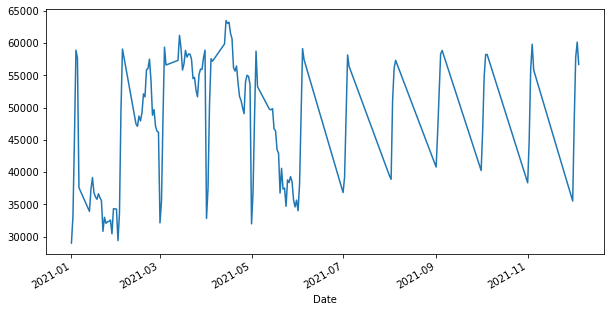

In [48]:
dataset['Open'].plot(figsize=(10,5))

In [49]:
#convert column of a dataframe
dataset["Volume"]=dataset["Volume"].astype(float)

In [50]:
#7 day rolling mean
dataset.rolling(7).mean().head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-01,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-01,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-01,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-01,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-01,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-01,32305.050224,34614.596819,31270.893417,33777.599051,33777.599051,7.086048e+10
2021-08-01,33789.015347,36378.327009,32418.757814,35409.521486,35409.521486,7.762865e+10
2021-09-01,35419.327569,37561.360490,33831.571151,36570.561386,36570.561386,7.678847e+10


<AxesSubplot:xlabel='Date'>

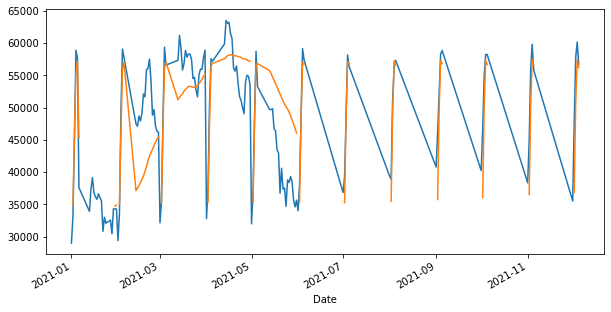

In [51]:
dataset['Open'].plot(figsize=(10,5))
dataset.rolling(window=30).mean()['Close'].plot()

<AxesSubplot:xlabel='Date'>

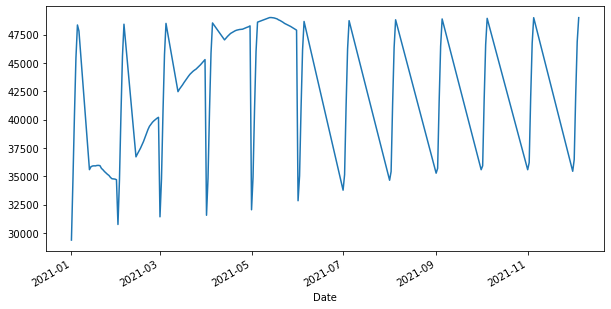

In [52]:
#optional specify a minimum number of periods
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(10,5))

In [53]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)

In [54]:
#Fearure scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [55]:
#Creating a data structure with 60 timesteps and 1 output
x_train=[]
y_train=[]
for i in range(60,152):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

#Reshaping
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

# Feature Extraction

In [56]:
#Importing the keras libraries and packages
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [57]:
# Initialiing the RNN
regressor=Sequential()

In [58]:
# Adding the first LSTM Layer and some Dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

#Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

#Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

#Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(units=1))

In [59]:
#Compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')

#Fitting the RNN to the Training set
regressor.fit(x_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
3/3 [==============================] - 16s 112ms/step - loss: 0.3818
Epoch 2/50
3/3 [==============================] - 0s 104ms/step - loss: 0.1016
Epoch 3/50
3/3 [==============================] - 0s 115ms/step - loss: 0.1232
Epoch 4/50
3/3 [==============================] - 0s 135ms/step - loss: 0.0657
Epoch 5/50
3/3 [==============================] - 0s 106ms/step - loss: 0.0827
Epoch 6/50
3/3 [==============================] - 0s 100ms/step - loss: 0.0568
Epoch 7/50
3/3 [==============================] - 0s 125ms/step - loss: 0.0664
Epoch 8/50
3/3 [==============================] - 0s 114ms/step - loss: 0.0567
Epoch 9/50
3/3 [==============================] - 0s 101ms/step - loss: 0.0500
Epoch 10/50
3/3 [==============================] - 0s 102ms/step - loss: 0.0456
Epoch 11/50
3/3 [==============================] - 0s 100ms/step - loss: 0.0479
Epoch 12/50
3/3 [==============================] - 0s 110ms/step - loss: 0.0491
Epoch 13/50
3/3 [==============================]

In [60]:
#Part 3 -Making the predictions and visualising the results

#Getting the real stock price of 2022
dataset_test=pd.read_csv('BTC_USD.csv',index_col="Date",parse_dates=True)

In [61]:
real_stock_price=dataset_test.iloc[:,1:2].values

In [62]:
dataset_test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,28994.00977,29600.62695,28803.58594,29374.15234,29374.15234,4.073030e+10
2021-02-01,29376.45508,33155.11719,29091.18164,32127.26758,32127.26758,6.786542e+10
2021-03-01,32129.40820,34608.55859,32052.31641,32782.02344,32782.02344,7.866524e+10
2021-04-01,32810.94922,33440.21875,28722.75586,31971.91406,31971.91406,8.116348e+10
2021-05-01,31977.04102,34437.58984,30221.18750,33992.42969,33992.42969,6.754732e+10


In [63]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 152 entries, 2021-01-01 to 2021-01-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       152 non-null    float64
 1   High       152 non-null    float64
 2   Low        152 non-null    float64
 3   Close      152 non-null    float64
 4   Adj Close  152 non-null    float64
 5   Volume     152 non-null    float64
dtypes: float64(6)
memory usage: 8.3 KB


In [64]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [65]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 152 entries, 2021-01-01 to 2021-01-06
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    152 non-null    float64
dtypes: float64(1)
memory usage: 2.4 KB


In [66]:
#Getting the predicted stock price of 2021
dataset_total=pd.concat((dataset['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
x_test=[]
for i in range(60,152):
    x_test.append(inputs[i-60:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock_price=regressor.predict(x_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

In [67]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       92 non-null     float32
dtypes: float32(1)
memory usage: 496.0 bytes


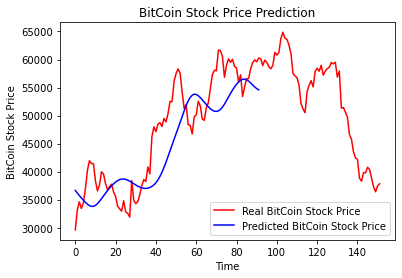

In [68]:
# Visualising the results
plt.plot(real_stock_price,color='red',label='Real BitCoin Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted BitCoin Stock Price')
plt.title('BitCoin Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('BitCoin Stock Price')
plt.legend()
plt.show()